In [1]:
# 라이브러리 추가
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.5)
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/KoPubDotumBold.ttf").get_name()
rc('font', family=font_name, size=20)

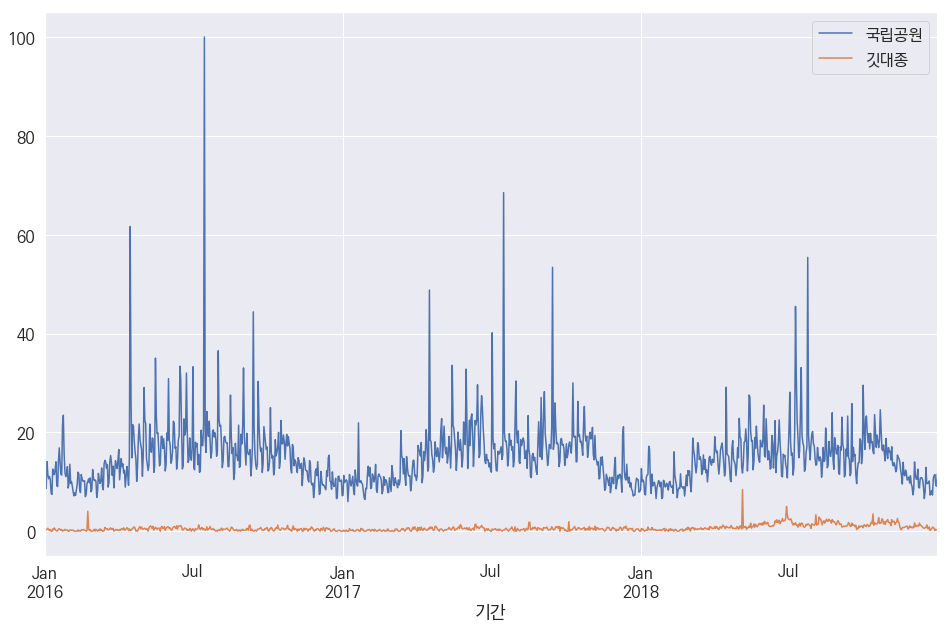

In [2]:
# '국립공원'과 '깃대종' 비교
df = pd.read_excel('D:/GEODATA/naverdatalab.xlsx', sheet_name='Sheet1' ,index_col='기간', parse_dates=True).drop(['Unnamed: 0'], axis=1)
df.plot(figsize=(16, 10))
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [3]:
# 피어슨 상관계수
df['국립공원'].corr(df['깃대종'], method='pearson')

0.18512067740205965

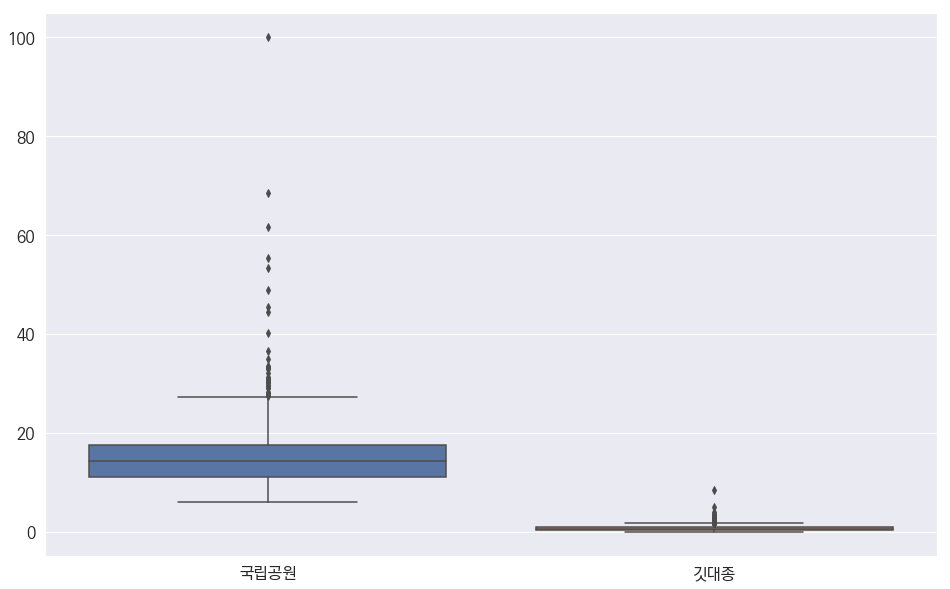

In [4]:
# '국립공원', '깃대종'
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[['국립공원', '깃대종']])
plt.savefig('D:/GEODATA/IMG02.png', bbox_inches='tight')

In [5]:
# 합계
df.groupby(df.index.year).median()

,국립공원,깃대종
기간,,
2016,13.95555,0.35555
2017,14.57777,0.38518
2018,14.22222,0.97777


In [6]:
# 퍼센트 변화
df.groupby(df.index.year).median().pct_change()

,국립공원,깃대종
기간,,
2016,NaN,NaN
2017,0.044586,0.083336
2018,-0.024390,1.538476


In [7]:
print('깃대종 검색량은 지난 2년간 ' + format(((0.97777 - 0.35555) / 0.35555) * 100, ".1f") + '% 증가')

깃대종 검색량은 지난 2년간 175.0% 증가


In [8]:
df['Year'] = df.index.year; df['Month'] = df.index.month
df = df.groupby([df.index.year, df.index.month]).median()

Text(0.5, 1.0, '깃대종 검색량')

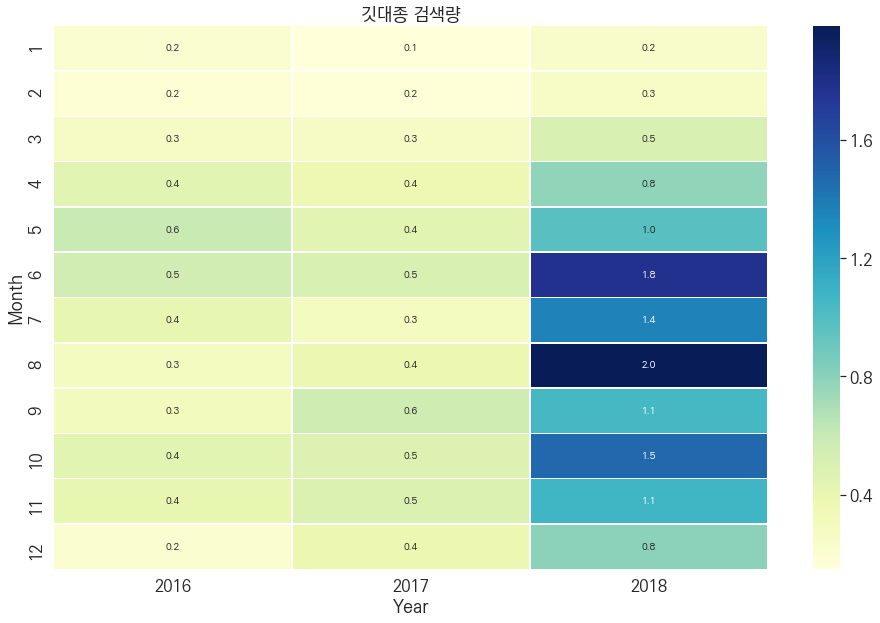

In [9]:
# '깃대종' 검색량 열지도
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.pivot("Month", "Year", "깃대종"), cmap="YlGnBu", annot=True, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('깃대종 검색량')
plt.savefig('D:/GEODATA/IMG03.png', bbox_inches='tight')

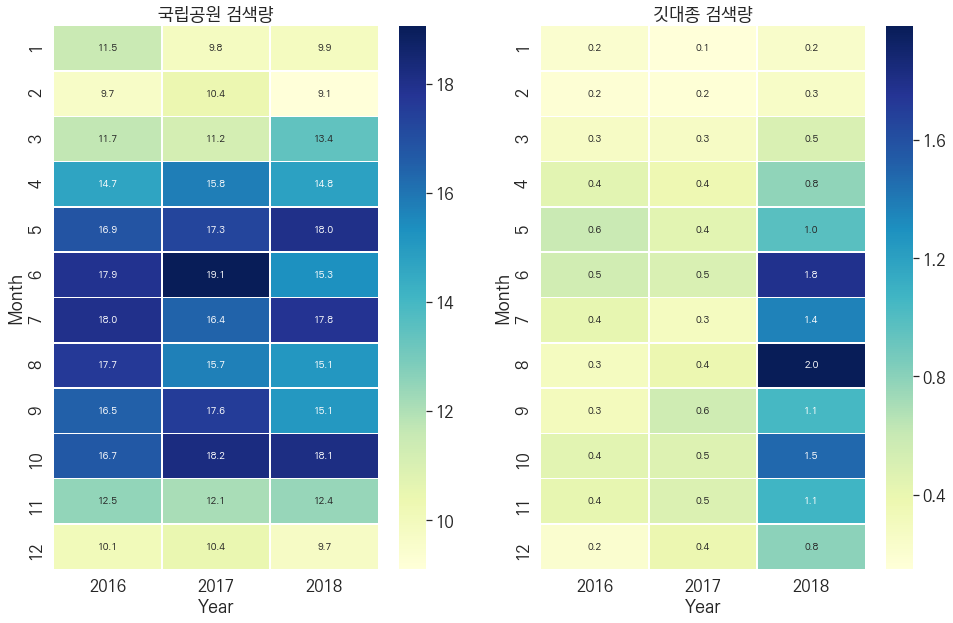

In [10]:
# '국립공원', 깃대종' 검색량 열지도
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
sns.heatmap(df.pivot("Month", "Year", "국립공원"), cmap="YlGnBu", annot=True, fmt='.1f', linewidths=.5, ax=ax1)
sns.heatmap(df.pivot("Month", "Year", "깃대종"), cmap="YlGnBu", annot=True, fmt='.1f', linewidths=.5, ax=ax2)
ax1.set_title('국립공원 검색량')
ax2.set_title('깃대종 검색량')
plt.show()
plt.savefig('D:/GEODATA/IMG04.png', bbox_inches='tight')